In [1]:
import hydra
from omegaconf import OmegaConf
from pathlib import Path

from src.utils.utils import print_config

In [2]:
READ_ROOT = "./data"
SAVE_ROOT = "./data"
DATAPREP_CONFIG = "configs/data_preparation/config.yaml"

In [3]:
config = OmegaConf.load(DATAPREP_CONFIG)
config.read_root = READ_ROOT
config.save_root = SAVE_ROOT
print_config(config)

⚙ CONFIG                                                                                     
├── read_root                                                                                
│   └── ./data                                                                               
├── save_root                                                                                
│   └── ./data                                                                               
├── data_flag                                                                                
│   └── full                                                                                 
├── artifacts_path                                                                           
│   └── ./data/artifacts/full                                                                
├── date_field                                                                               
│   └── date                                                                                 
├── user_field                                                                               
│   └── playerId                                                                             
├── save_prefix                                                                              
│   └── train                                                                                
├── filter_query                                                                             
│   └──                                                                                      
├── player_artifact_name                                                                     
│   └── playerid_mapping.pkl                                                                 
├── team_artifact_name                                                                       
│   └── teamid_mapping.pkl                                                                   
├── targets_artifact_name                                                                    
│   └── targets.pkl                                                                          
├── plscores1_artifact_name                                                                  
│   └── plscores1.pkl                                                                        
├── plscores2_artifact_name                                                                  
│   └── plscores2.pkl                                                                        
├── plscores3_artifact_name                                                                  
│   └── plscores3.pkl                                                                        
├── plscores4_artifact_name                                                                  
│   └── plscores4.pkl                                                                        
├── plscores5_artifact_name                                                                  
│   └── plscores5.pkl                                                                        
├── tscores1_artifact_name                                                                   
│   └── tscores1.pkl                                                                         
├── tscores2_artifact_name                                                                   
│   └── tscores2.pkl                                                                         
├── prepare_playeridartifact                                                                 
│   └── _target_: sklearn.pipeline.Pipeline                                                  
│       steps:                                                                               
│       - - dataloader                                                                       
│         - _target_: src.pipelines.artifacts.DataLoader                                     
│           load_path: ./data                       

In [4]:
playerid_mapper = hydra.utils.instantiate(config.prepare_playeridartifact)
playerid_mapper.transform('players.csv')

True

In [5]:
teamid_mapper = hydra.utils.instantiate(config.prepare_teamidartifact)
teamid_mapper.transform('teams.csv')

True

In [ ]:
p3d = hydra.utils.instantiate(config.prepare_3Dartifacts)
p3d.transform('train.csv')

In [20]:
import joblib
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# For 5 players manual checks
# check nan values

In [10]:
targets = joblib.load("data/artifacts/full/tr_targets.pkl")

In [10]:
data = pd.read_csv("data/train.csv")

In [11]:
data.sample(10)

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
987,20200914,"[{""engagementMetricsDate"":""2020-09-15"",""player...","[{""gamePk"":631588,""gameType"":""R"",""season"":2020...","[{""playerId"":408234,""gameDate"":""2020-09-14"",""t...","[{""home"":1,""gamePk"":631588,""gameDate"":""2020-09...","[{""home"":0,""teamId"":138,""gamePk"":631288,""gameD...","[{""transactionId"":451398,""playerId"":448801,""pl...","[{""season"":2020,""gameDate"":""2020-09-14"",""divis...",NaN,"[{""gamePk"":631482,""gameDate"":""2020-09-14"",""gam...",NaN,NaN
702,20191204,"[{""engagementMetricsDate"":""2019-12-05"",""player...",NaN,"[{""playerId"":405395,""gameDate"":""2019-12-04"",""t...",NaN,NaN,"[{""transactionId"":478590,""playerId"":605164,""pl...",NaN,"[{""awardId"":""MILBORGAS"",""awardName"":""MiLB.com ...",NaN,NaN,NaN
1020,20201017,"[{""engagementMetricsDate"":""2020-10-18"",""player...","[{""gamePk"":635895,""gameType"":""L"",""season"":2020...","[{""playerId"":425794,""gameDate"":""2020-10-17"",""t...","[{""home"":1,""gamePk"":635895,""gameDate"":""2020-10...","[{""home"":0,""teamId"":117,""gamePk"":635895,""gameD...",NaN,NaN,"[{""awardId"":""ALCSMVP"",""awardName"":""ALCS MVP"",""...","[{""gamePk"":635895,""gameDate"":""2020-10-17"",""gam...",NaN,NaN
103,20180414,"[{""engagementMetricsDate"":""2018-04-15"",""player...","[{""gamePk"":529612,""gameType"":""R"",""season"":2018...","[{""playerId"":279571,""gameDate"":""2018-04-14"",""t...","[{""home"":0,""gamePk"":529622,""gameDate"":""2018-04...","[{""home"":0,""teamId"":134,""gamePk"":529622,""gameD...","[{""transactionId"":352444,""playerId"":680656,""pl...","[{""season"":2018,""gameDate"":""2018-04-14"",""divis...",NaN,"[{""gamePk"":529617,""gameDate"":""2018-04-14"",""gam...",NaN,NaN
486,20190502,"[{""engagementMetricsDate"":""2019-05-03"",""player...","[{""gamePk"":566004,""gameType"":""R"",""season"":2019...","[{""playerId"":408234,""gameDate"":""2019-05-02"",""t...","[{""home"":0,""gamePk"":565912,""gameDate"":""2019-05...","[{""home"":0,""teamId"":138,""gamePk"":565912,""gameD...","[{""transactionId"":399446,""playerId"":453344,""pl...","[{""season"":2019,""gameDate"":""2019-05-02"",""divis...",NaN,"[{""gamePk"":567569,""gameDate"":""2019-05-02"",""gam...",NaN,NaN
419,20190224,"[{""engagementMetricsDate"":""2019-02-25"",""player...","[{""gamePk"":565397,""gameType"":""S"",""season"":2019...","[{""playerId"":425794,""gameDate"":""2019-02-24"",""t...",NaN,NaN,"[{""transactionId"":388829,""playerId"":664590,""pl...",NaN,NaN,NaN,NaN,NaN
142,20180523,"[{""engagementMetricsDate"":""2018-05-24"",""player...","[{""gamePk"":530141,""gameType"":""R"",""season"":2018...","[{""playerId"":134181,""gameDate"":""2018-05-23"",""t...","[{""home"":1,""gamePk"":530145,""gameDate"":""2018-05...","[{""home"":0,""teamId"":114,""gamePk"":530135,""gameD...","[{""transactionId"":354937,""playerId"":624636,""pl...","[{""season"":2018,""gameDate"":""2018-05-23"",""divis...",NaN,"[{""gamePk"":530138,""gameDate"":""2018-05-23"",""gam...",NaN,NaN
780,20200220,"[{""engagementMetricsDate"":""2020-02-21"",""player...",NaN,"[{""playerId"":425772,""gameDate"":""2020-02-20"",""t...",NaN,NaN,"[{""transactionId"":439757,""playerId"":500724,""pl...",NaN,NaN,NaN,NaN,NaN
1035,20201101,"[{""engagementMetricsDate"":""2020-11-02"",""player...",NaN,"[{""playerId"":435622,""gameDate"":""2020-11-01"",""t...",NaN,NaN,"[{""transactionId"":454697,""playerId"":607455,""pl...",NaN,NaN,NaN,"[{""date"":""2020-11-01"",""playerId"":545361,""playe...","[{""date"":""2020-11-01"",""teamId"":147,""teamName"":..."
269,20180927,"[{""engagementMetricsDate"":""2018-09-28"",""player...","[{""gamePk"":531787,""gameType"":""R"",""season"":2018...","[{""playerId"":408045,""gameDate"":""2018-09-27"",""t...","[{""home"":1,""gamePk"":531786,""gameDate"":""2018-09...","[{""home"":1,""teamId"":112,""gamePk"":531791,""gameD...","[{""transactionId"":37

In [13]:
import pandas as pd
pd.read_json(data.iloc[0]['rosters']).teamId.unique()

array([116, 142, 120, 136, 121, 141, 145, 115, 158, 119, 135, 139, 118,
       144, 137, 113, 147, 134, 114, 108, 117, 109, 143, 140, 111, 133,
       146, 112, 110, 138])

In [113]:
prev6_row = data.loc[596]

prev5_row = data.loc[597]

prev4_row = data.loc[598]
prev_prev_prev_row = data.loc[599]

In [128]:
next_row = data.iloc[603]

In [86]:
prev_prev_row = data.loc[600]

In [82]:
prev_row = data.loc[601]

In [14]:
row = data.loc[602]
row_targets = pd.read_json(row['nextDayPlayerEngagement'])
row_targets.head()

,engagementMetricsDate,playerId,target1,target2,target3,target4
0,2019-08-27,475253,1.515366,10.878528,0.006920,10.196261
1,2019-08-27,649966,0.017070,6.628608,0.004735,4.273604
2,2019-08-27,596059,0.020917,4.733587,0.008741,2.403902
3,2019-08-27,605452,0.012021,0.761180,0.002185,0.290326
4,2019-08-27,621566,0.401742,9.427529,0.010198,0.000000


In [16]:
print(row_targets.playerId.nunique(), row_targets.engagementMetricsDate.nunique())

2061 1


In [18]:
row_targets.shape

(2061, 6)

/home/mohsin_okcredit_in/anaconda3/envs/setienv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target4', ylabel='Density'>

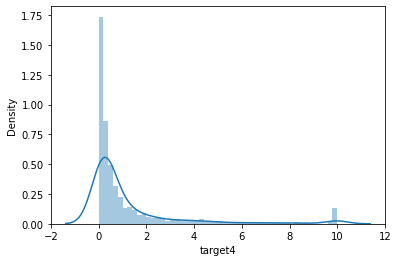

In [121]:
sns.distplot(row_targets.target4.clip(0, 10))

In [95]:
row_targets_high = row_targets.loc[row_targets.target2 >10]
high_score_players = row_targets_high.playerId.unique()
len(high_score_players)

179

In [42]:
pd.set_option('display.max_columns', 100)
row_player_scores = pd.read_json(row['playerBoxScores'])
row_player_scores.head()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
0,0,565418,2019-08-26,2019-08-26T19:10:00Z,144,Atlanta Braves,452095,Tyler Flowers,25,2,Catcher,Catcher,702.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
1,1,567617,2019-08-26,2019-08-26T23:05:00Z,158,Milwaukee Brewers,444489,Manny Pina,9,2,Catcher,Catcher,301.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
2,0,565418,2019-08-26,2019-08-26T19:10:00Z,144,Atlanta Braves,571740,Billy Hamilton,9,12,Pinch Runner,Runner,701.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,642180,Tyler Wade,14,4,Second Base,Infielder,901.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,565765,2019-08-26,2019-08-27T00:15:00Z,133,Oakland Athletics,543302,Chris Herrmann,5,7,Outfielder,Outfielder,402.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [129]:
prev_row_player_scores = pd.read_json(prev_row['playerBoxScores'])
prev_prev_row_player_scores = pd.read_json(prev_prev_row['playerBoxScores'])
prev_prev_prev_row_player_scores = pd.read_json(prev_prev_prev_row['playerBoxScores'])
prev4_row_player_scores = pd.read_json(prev4_row['playerBoxScores'])
prev5_row_player_scores = pd.read_json(prev5_row['playerBoxScores'])
prev6_row_player_scores = pd.read_json(prev6_row['playerBoxScores'])
next_row_player_scores = pd.read_json(next_row['playerBoxScores'])

prev_row_player_scores.head()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
0,1,566152,2019-08-25,2019-08-25T20:07:00Z,133,Oakland Athletics,595777,Jurickson Profar,23,10,Designated Hitter,Hitter,600.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,0,566631,2019-08-25,2019-08-25T18:15:00Z,115,Colorado Rockies,475174,Yonder Alonso,13,3,First Base,Infielder,500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,6.0
2,1,567616,2019-08-25,2019-08-25T18:10:00Z,158,Milwaukee Brewers,606115,Orlando Arcia,3,6,Shortstop,Infielder,800.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,0.0,6.0
3,0,567425,2019-08-25,2019-08-25T17:10:00Z,143,Philadelphia Phillies,572816,Corey Dickerson,31,7,Outfielder,Outfielder,400.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,0,564997,2019-08-25,2019-08-25T17:05:00Z,139,Tampa Bay Rays,572287,Mike Zunino,10,2,Catcher,Catcher,900.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,0.0,9.0


In [49]:
row_player_scores.tail()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
237,1,566340,2019-08-26,2019-08-27T02:10:00Z,135,San Diego Padres,641778,Eric Lauer,46,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,4.0,8.0,2.0,3.0,2.0,0.0,2.0,8.0,4.0,1.0,6.0,0.0,24.0,0.0,0.0,6.0,0.0,3.0,29.0,18.0,110.0,39.0,71.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0
238,0,567125,2019-08-26,2019-08-26T23:05:00Z,134,Pittsburgh Pirates,605397,Joe Musgrove,59,1,Pitcher,Pitcher,900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,3.0,8.0,4.0,2.0,0.0,0.0,1.0,6.0,0.0,0.0,5.0,0.0,23.0,0.0,0.0,6.0,0.0,2.0,23.0,18.0,82.0,21.0,61.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
239,1,567125,2019-08-26,2019-08-26T23:05:00Z,143,Philadelphia Phillies,450306,Jason Vargas,44,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,6.0,10.0,3.0,4.0,2.0,0.0,0.0,4.0,1.0,0.0,7.0,0.0,24.0,1.0,0.0,6.0,0.0,4.0,25.0,18.0,92.0,38.0,54.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,0.0,3.0
240,0,565418,2019-08-26,2019-08-26T19:10:00Z,144,Atlanta Braves,527054,Julio Teheran,49,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,3.0,4.0,8.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,19.0,0.0,1.0,6.0,0.0,0.0,22.0,18.0,97.0,39.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0
241,0,567426,2019-08-26,2019-08-26T23:10:00Z,113,Cincinnati Reds,543243,Sonny Gray,54,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,5.0,6.0,6.0,2.0,0.0,0.0,1.0,6.0,5.0,0.0,2.0,0.0,20.0,0.0,1.0,6.0,0.0,2.0,25.0,18.0,102.0,46.0,56.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,0.0,2.0


In [50]:
row_player_scores.loc[row_player_scores.gamesPlayedBatting.isnull()]

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
174,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,518715,Cory Gearrin,35,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.1,0.0,0.0,3.0,1.0,18.0,8.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
186,0,565765,2019-08-26,2019-08-27T00:15:00Z,133,Oakland Athletics,642152,Lou Trivino,62,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,6.0,3.0,22.0,10.0,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
187,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,592454,Tommy Kahnle,48,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,13.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
188,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,547973,Aroldis Chapman,54,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
189,1,566438,2019-08-26,2019-08-27T02:10:00Z,136,Seattle Mariners,605538,Matt Wisler,44,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,12.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,1,566438,2019-08-26,2019-08-27T02:10:00Z,136,Seattle Mariners,657024,Erik Swanson,50,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,12.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
204,1,565765,2019-08-26,2019-08-27T00:15:00Z,118,Kansas City Royals,622092,Kyle Zimmer,45,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,10.0,0.0,0.0,1.1,0.0,4.0,11.0,4.0,51.0,18.0,33.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
205,1,565765,2019-08-26,2019-08-27T00:15:00Z,118,K

In [133]:
pscores1 = joblib.load("data/artifacts/full/train_plscores1.pkl")
pscores2 = joblib.load("data/artifacts/full/train_plscores2.pkl")
pscores3 = joblib.load("data/artifacts/full/train_plscores3.pkl")
pscores4 = joblib.load("data/artifacts/full/train_plscores4.pkl")
pscores5 = joblib.load("data/artifacts/full/train_plscores5.pkl")

In [139]:
players_idx = pscores1['playerId']
dates_p1 = pscores1['date']
pid  = np.where(players_idx == 518715)[0][0]
did = np.where(dates_p1 == 20190826)[0][0]
print(pid, did)
print(pscores1['data'][did, pid])
print(pscores2['data'][did, pid])
print(pscores3['data'][did, pid])
print(pscores4['data'][did, pid])
print(pscores5['data'][did, pid])

1759 358
[ 0. 35.  1.  1. nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
[nan  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[nan  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  2.  0.  0.]
[ 0.1  0.   3.   1.  18.   8.  10.   0.   1.   0.   0.   0.   0.   0.
  0.   0.   0.   nan  nan  nan  nan]


In [43]:
row_player_scores.playerId.nunique(), row_player_scores.teamId.nunique()

(242, 16)

In [48]:
row_player_scores.groupby('playerId')['gamePk'].nunique()

playerId
425794    1
425877    1
430945    1
434158    1
434538    1
         ..
669222    1
669242    1
669257    1
669374    1
670032    1
Name: gamePk, Length: 242, dtype: int64

In [46]:
len(set(high_score_players) & set(row_player_scores.playerId.unique())) / len(high_score_players)

0.5655172413793104

In [45]:
row_player_scores.gamesPlayedBatting.value_counts()

1.0    226
Name: gamesPlayedBatting, dtype: int64

In [51]:
row_player_scores.gamesPlayedPitching.value_counts()

1.0    70
Name: gamesPlayedPitching, dtype: int64

In [52]:
rosters = pd.read_json(row['rosters'])
print(rosters.shape)
rosters.head()

(1296, 5)


,playerId,gameDate,teamId,statusCode,status
0,407845,2019-08-26,120,A,Active
1,425844,2019-08-26,117,A,Active
2,429665,2019-08-26,147,D10,Injured 10-Day
3,430945,2019-08-26,109,A,Active
4,433587,2019-08-26,136,A,Active


In [70]:
rosters.statusCode.value_counts()

A      749
RM     324
D60    113
D10    107
D7       1
BRV      1
FME      1
Name: statusCode, dtype: int64

In [53]:
rosters.playerId.nunique()

1296

In [98]:
len(set(row_targets.loc[row_targets.target2 > 3.0, 'playerId']) - set(rosters.playerId.unique()))

6

In [130]:
high_targets = set(row_targets.loc[row_targets.target4 > 1, 'playerId'])
row_scores = set(row_player_scores.playerId.unique())
prev_row_scores = set(prev_row_player_scores.playerId.unique())
prev_prev_row_scores = set(prev_prev_row_player_scores.playerId.unique())
prev_prev_prev_row_scores = set(prev_prev_prev_row_player_scores.playerId.unique())
prev4_row_scores = set(prev4_row_player_scores.playerId.unique())
prev5_row_scores = set(prev5_row_player_scores.playerId.unique())
prev6_row_scores = set(prev6_row_player_scores.playerId.unique())
next_row_scores = set(next_row_player_scores.playerId.unique())

print(len(high_targets - row_scores), len(high_targets - row_scores - prev_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores - prev5_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores - prev5_row_scores - prev6_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores - prev5_row_scores - prev6_row_scores - next_row_scores),

 len(high_targets))

404 268 214 195 182 162 154 146 563


In [123]:
high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev4_row_scores - prev5_row_scores - prev6_row_scores

{112526,
 134181,
 400085,
 400121,
 400284,
 407812,
 408045,
 408236,
 408252,
 408314,
 425844,
 429664,
 429665,
 430832,
 431148,
 431151,
 434670,
 434671,
 434778,
 435079,
 435221,
 444432,
 444876,
 446263,
 446372,
 446386,
 448179,
 448281,
 448602,
 450314,
 451661,
 452104,
 452655,
 452657,
 453064,
 453214,
 453268,
 453562,
 455976,
 456030,
 456034,
 456488,
 456501,
 456665,
 456713,
 457454,
 457705,
 457803,
 458015,
 458675,
 458681,
 460026,
 460077,
 460576,
 461314,
 461833,
 461865,
 462136,
 467055,
 468504,
 471865,
 475582,
 476454,
 476704,
 476883,
 493200,
 493316,
 501896,
 502082,
 502578,
 503285,
 518466,
 518774,
 518813,
 519242,
 519317,
 519381,
 521692,
 542255,
 542921,
 543281,
 543305,
 543768,
 546318,
 546991,
 547943,
 547982,
 570256,
 571506,
 571745,
 571841,
 571851,
 571946,
 572020,
 572073,
 572096,
 572140,
 572191,
 572204,
 572228,
 573185,
 575929,
 579328,
 581527,
 591720,
 592102,
 592122,
 592647,
 594798,
 594828,
 594988,
 

In [102]:
players = pd.read_csv("data/players.csv")

In [126]:
players.loc[players.playerId == 666915]

,playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
145,666915,Bobby Dalbec,1995-06-29,2020-08-30,Seattle,WA,USA,76,227,3,First Base,True


In [127]:
players.loc[players.playerId == 666211]

,playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
88,666211,Taylor Trammell,1997-09-13,2021-04-01,Powder Springs,GA,USA,74,213,8,Outfielder,True


In [ ]:
standings = pd.read_csv("data/")

In [73]:
row_targets.loc[row_targets.playerId.isin(rosters.loc[rosters.statusCode == 'A', 'playerId'])].describe()

,playerId,target1,target2,target3,target4
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,573558.582888,1.475197,9.404442,1.059782,3.411738
std,68069.097753,5.989537,14.734334,4.650685,8.168326
min,282332.000000,0.000000,0.348874,0.000000,0.000000
25%,520217.000000,0.004087,1.708690,0.002185,0.519684
50%,592872.500000,0.044237,4.158738,0.011837,1.207758
75%,623165.250000,0.574603,9.352204,0.138315,3.196493
max,673258.000000,100.000000,100.000000,51.164434,100.000000


In [71]:
row_targets.loc[row_targets.playerId.isin(rosters.loc[rosters.statusCode == 'RM', 'playerId'])].describe()

,playerId,target1,target2,target3,target4
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,626088.657980,0.005351,0.588654,0.820377,0.369915
std,35049.918543,0.047968,1.767732,8.219144,1.235331
min,446868.000000,0.000000,0.063432,0.000000,0.000000
25%,605503.000000,0.000000,0.214082,0.000000,0.110324
50%,624503.000000,0.000240,0.301300,0.000364,0.197422
75%,656719.000000,0.000962,0.523311,0.001821,0.336779
max,677976.000000,0.708517,23.200127,100.000000,20.984787


In [77]:
row_targets.loc[row_targets.playerId.isin(rosters.loc[rosters.statusCode == 'FME', 'playerId'])].describe()

,playerId,target1,target2,target3,target4
count,1.0,1.000000,1.000000,1.000000,1.000000
mean,607644.0,0.064673,1.990168,0.331447,0.661944
std,NaN,NaN,NaN,NaN,NaN
min,607644.0,0.064673,1.990168,0.331447,0.661944
25%,607644.0,0.064673,1.990168,0.331447,0.661944
50%,607644.0,0.064673,1.990168,0.331447,0.661944
75%,607644.0,0.064673,1.990168,0.331447,0.661944
max,607644.0,0.064673,1.990168,0.331447,0.661944
